## Análisis de Datos Meteorológicos con una API Pública
Obtener datos del clima de una ciudad usando la API de Open-Meteo (https://open-meteo.com/) y mostrar el pronóstico para Bilbao.

* Haz una petición a la API para que devuelva el pronóstico de las temperaturas para una semana en Bilbao. Tip: el parámetro correspondiente en el query es `temperature_2m` además de la latitud y la longitud.
* Procesa la respuesta en formato JSON para obtener dos listas: una con la lista de temperaturas y otra con las fechas-horas correspondientes.
* Crea un DataFrame con esas dos columnas: `Hora` y `Temperatura`
* Elige la gráfica adecuada y visualiza el pronóstico de temperaturas.

Para crear la variable `Hora` del DataFrame puedes introducir directamente la lista que se obtiene del campo `data["hourly"]["time"]` o procesar esa lista mediante el siguiente código:

`hours = pd.date_range(start=lista_de_horas, periods=len(temps), freq="H")`

In [65]:
import requests
import pprint
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px



# # Coordenadas de Kuna en Bilbao
# latitude = 43.2540
# longitude = -2.9230


# url = f"https://api.open-meteo.com/v1/forecast?"  # Aquí vienen el resto de los parámetros



In [7]:
url = "https://api.open-meteo.com/v1/forecast?latitude=43.2627&longitude=-2.9253&hourly=temperature_2m&start_date=2025-11-16&end_date=2025-11-20"  # Reemplaza con la URL de la API que deseas acceder.

response = requests.get(url)
response.json()
if response.status_code == 200:  # Código 200 indica una respuesta exitosa.
    data = response.json()  # Analizar la respuesta JSON.
    #print(data["value"])
    print(data)
else:
    print("Error en la solicitud: ", response.status_code)


{'latitude': 43.26, 'longitude': -2.9300003, 'generationtime_ms': 0.10395050048828125, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 21.0, 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C'}, 'hourly': {'time': ['2025-11-16T00:00', '2025-11-16T01:00', '2025-11-16T02:00', '2025-11-16T03:00', '2025-11-16T04:00', '2025-11-16T05:00', '2025-11-16T06:00', '2025-11-16T07:00', '2025-11-16T08:00', '2025-11-16T09:00', '2025-11-16T10:00', '2025-11-16T11:00', '2025-11-16T12:00', '2025-11-16T13:00', '2025-11-16T14:00', '2025-11-16T15:00', '2025-11-16T16:00', '2025-11-16T17:00', '2025-11-16T18:00', '2025-11-16T19:00', '2025-11-16T20:00', '2025-11-16T21:00', '2025-11-16T22:00', '2025-11-16T23:00', '2025-11-17T00:00', '2025-11-17T01:00', '2025-11-17T02:00', '2025-11-17T03:00', '2025-11-17T04:00', '2025-11-17T05:00', '2025-11-17T06:00', '2025-11-17T07:00', '2025-11-17T08:00', '2025-11-17T09:00', '2025-11-17T10:00', '2025-11-17T11:00', '2025-11-17T12:00

In [ ]:
import pprint
for elemento in response.json()[]:
    pprint.pprint(elemento)

'latitude'
'longitude'
'generationtime_ms'
'utc_offset_seconds'
'timezone'
'timezone_abbreviation'
'elevation'
'hourly_units'
'hourly'


In [ ]:
# result = response.json()
# clima = {
#         "time":[],
#         "temperature": []
# }

# for elemento in result['hourly']['time']:
#     # print(elemento)
#     clima["time"].append(elemento)
#     # clima["temperature"].append(result["hourly"]['temperature_2m'])
# for elemento in result['hourly']['temperature_2m']:
#     # print(elemento)
#     clima["temperature"].append(elemento)
    
# clima

In [56]:
result = response.json()
clima = {
        "time":result['hourly']['time'],
        "temperature": result['hourly']['temperature_2m']
}

In [60]:
climadf = pd.DataFrame(clima)

In [58]:
climadf

,time,temperature
0,2025-11-16T00:00,16.5
1,2025-11-16T01:00,16.4
2,2025-11-16T02:00,15.9
3,2025-11-16T03:00,15.8
4,2025-11-16T04:00,15.5
...,...,...
115,2025-11-20T19:00,10.6
116,2025-11-20T20:00,10.3
117,2025-11-20T21:00,9.4
118,2025-11-20T22:00,11.1


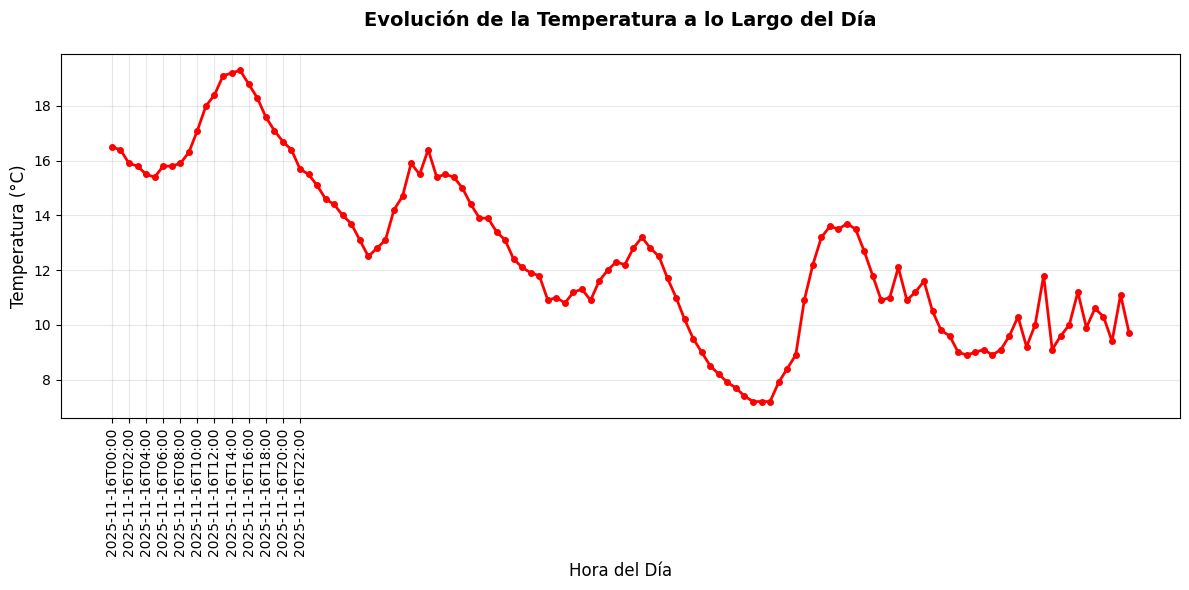

In [64]:
# Suponiendo que tienes un DataFrame con columnas 'hora' y 'temperatura'
plt.figure(figsize=(12, 6))
plt.plot(climadf['time'], climadf['temperature'], 
         marker='o',           # Puntos en cada medición
         linestyle='-',        # Línea continua
         color='red',          # Color rojo (calor)
         linewidth=2,
         markersize=4)

plt.title('Evolución de la Temperatura a lo Largo del Día', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Hora del Día', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.grid(True, alpha=0.3)

# Mejorar el eje X para horas
plt.xticks(range(0, 24, 2), rotation = 90)  # Marcas cada 2 horas

plt.tight_layout()
plt.show()

In [68]:
fig = px.line(climadf, 
              x='time', 
              y='temperature',
              title='Temperatura por Hora',
              labels={'hora': 'Hora del Día', 'temperatura': 'Temperatura (°C)'})

fig.show()